In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load and prepare multi-class dataset
X, y = load_digits(return_X_y=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining decision tree classifier
tree = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fit the tree to the data
tree.fit(X_scaled, y)

# Predict leaf node for each sample
leaf_nodes = tree.apply(X_scaled)

# Verify leaf nodes
unique_leaves = np.unique(leaf_nodes)
print(f"Number of unique leaves: {len(unique_leaves)}")


Number of unique leaves: 30


In [2]:
from scipy.stats import beta

# Initialize beta distributions for each leaf
leaf_beta_distributions = {leaf: {'alpha': 1, 'beta': 1} for leaf in unique_leaves}

# Function to update beta distribution based on observed rewards
def update_beta_distribution(leaf, reward):
    leaf_beta_distributions[leaf]['alpha'] += reward
    leaf_beta_distributions[leaf]['beta'] += (1 - reward)

# Simulate updates to the beta distribution
for i in range(X_scaled.shape[0]):
    leaf = leaf_nodes[i]
    reward = np.random.binomial(1, 0.5)  # Example reward
    update_beta_distribution(leaf, reward)

# Verify beta distributions
for leaf, dist in leaf_beta_distributions.items():
    print(f"Leaf {leaf}: Alpha = {dist['alpha']}, Beta = {dist['beta']}")


Leaf 4: Alpha = 3, Beta = 5
Leaf 6: Alpha = 3, Beta = 4
Leaf 7: Alpha = 3, Beta = 4
Leaf 9: Alpha = 2, Beta = 1
Leaf 11: Alpha = 2, Beta = 1
Leaf 12: Alpha = 97, Beta = 75
Leaf 16: Alpha = 10, Beta = 9
Leaf 17: Alpha = 2, Beta = 1
Leaf 19: Alpha = 2, Beta = 2
Leaf 20: Alpha = 2, Beta = 2
Leaf 23: Alpha = 1, Beta = 2
Leaf 24: Alpha = 29, Beta = 29
Leaf 26: Alpha = 3, Beta = 2
Leaf 27: Alpha = 3, Beta = 4
Leaf 32: Alpha = 30, Beta = 33
Leaf 33: Alpha = 19, Beta = 23
Leaf 35: Alpha = 3, Beta = 2
Leaf 36: Alpha = 74, Beta = 70
Leaf 39: Alpha = 17, Beta = 11
Leaf 40: Alpha = 13, Beta = 10
Leaf 42: Alpha = 81, Beta = 83
Leaf 43: Alpha = 3, Beta = 8
Leaf 47: Alpha = 10, Beta = 18
Leaf 48: Alpha = 15, Beta = 6
Leaf 50: Alpha = 88, Beta = 96
Leaf 51: Alpha = 10, Beta = 12
Leaf 54: Alpha = 130, Beta = 153
Leaf 55: Alpha = 188, Beta = 199
Leaf 57: Alpha = 62, Beta = 50
Leaf 58: Alpha = 17, Beta = 20


In [3]:
# Function to sample action from beta distribution for each leaf
def sample_action(leaf):
    alpha = leaf_beta_distributions[leaf]['alpha']
    beta_value = leaf_beta_distributions[leaf]['beta']
    return np.random.beta(alpha, beta_value)

# Simulate action selection
sampled_actions = []
for i in range(X_scaled.shape[0]):
    leaf = leaf_nodes[i]
    sampled_action = sample_action(leaf)
    sampled_actions.append(sampled_action)

# Verify sampled actions
print(f"Sampled actions (first 10): {sampled_actions[:10]}")


Sampled actions (first 10): [0.635240627919171, 0.5205352833528701, 0.4447062844385066, 0.4753001377879084, 0.9582970464380901, 0.450299370672912, 0.4407466184653768, 0.4246538556984751, 0.46149622957117964, 0.5020165377537096]


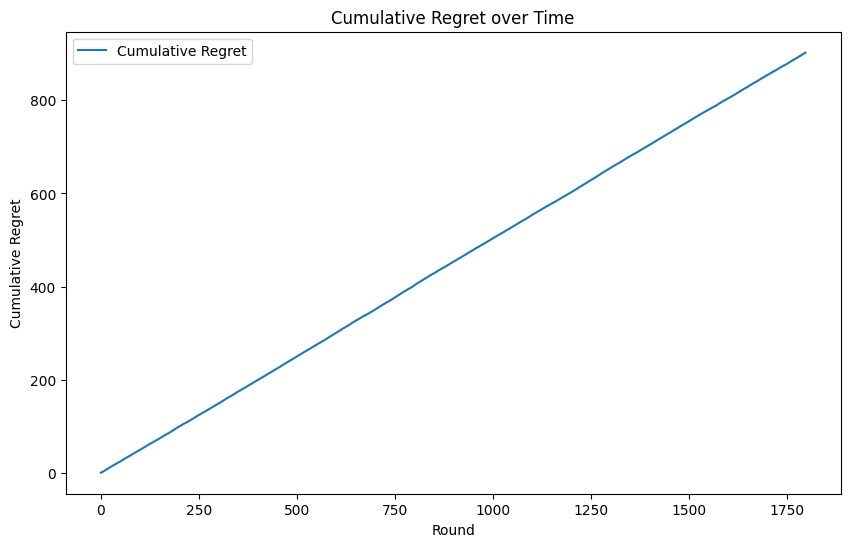

In [4]:
# Define the optimal reward function (for illustration purposes)
def optimal_reward(context):
    return 1  # Replace with actual logic to determine the optimal reward

# Calculate the optimal rewards
optimal_rewards = np.array([optimal_reward(ctx) for ctx in X_scaled])

# Calculate the observed rewards (for illustration purposes)
observed_rewards = np.array(sampled_actions)  # Example observed rewards

# Calculate instantaneous regret
instantaneous_regret = optimal_rewards - observed_rewards

# Calculate cumulative regret
cumulative_regret = np.cumsum(instantaneous_regret)

# Plot cumulative regret
plt.figure(figsize=(10, 6))
plt.plot(cumulative_regret, label='Cumulative Regret')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret over Time')
plt.legend()
plt.show()
